In [1]:
import pandas as pd
from transformers import pipeline

df = pd.read_csv('Design-Museum-Most-Relevant-360.csv')

In [2]:
# sentiment analysis

model_path = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
sentiment_task = pipeline('sentiment-analysis', model=model_path, tokenizer=model_path)

reviews = df['review_text'].tolist()
results = sentiment_task(reviews)

df['sentiment'] = [result['label'] for result in results]
df['score'] = [result['score'] for result in results]

print(df[['sentiment', 'score', 'review_rating', 'review_text']].head())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  sentiment     score  review_rating  \
0  positive  0.412435              3   
1  positive  0.768872              4   
2   neutral  0.383132              3   
3  positive  0.832962              4   
4  positive  0.760265              4   

                                         review_text  
0  It saddens me to review it low, but I must agr...  
1  Really cute museum. A little more expensive th...  
2  I had a long layover in Helsinki before my fli...  
3  Quite a small museum but really interesting to...  
4  Design needs to be useful, and this museum per...  


In [5]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=bab7b7de45f890b05d1f43b9c1511f12ba4e26ba20098a5138feaa7de4c439eb
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [6]:
# translate reviews to English

from langdetect import detect

translator = pipeline('translation', model='Helsinki-NLP/opus-mt-mul-en')

def detect_and_translate(review):
    try:
        lang = detect(review)
        if lang == 'en':
            return review
        else:
            translation = translator(review, max_length=512, truncation=True)
            return translation[0]['translation_text']
    except:
        return review

df['translated_review'] = df['review_text'].apply(detect_and_translate)

print(df[['sentiment', 'score', 'review_rating', 'translated_review']].head())

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


  sentiment     score  review_rating  \
0  positive  0.412435              3   
1  positive  0.768872              4   
2   neutral  0.383132              3   
3  positive  0.832962              4   
4  positive  0.760265              4   

                                   translated_review  
0  It saddens me to review it low, but I must agr...  
1  Really cute museum. A little more expensive th...  
2  I had a long layover in Helsinki before my fli...  
3  Quite a small museum but really interesting to...  
4  Design needs to be useful, and this museum per...  


In [7]:
df = df[['sentiment', 'score', 'review_rating', 'translated_review']]

df.to_csv('sentiment_reviews.tsv', index=False, header=True, sep='\t', encoding='utf-16')

In [8]:
!pip install wordcloud matplotlib

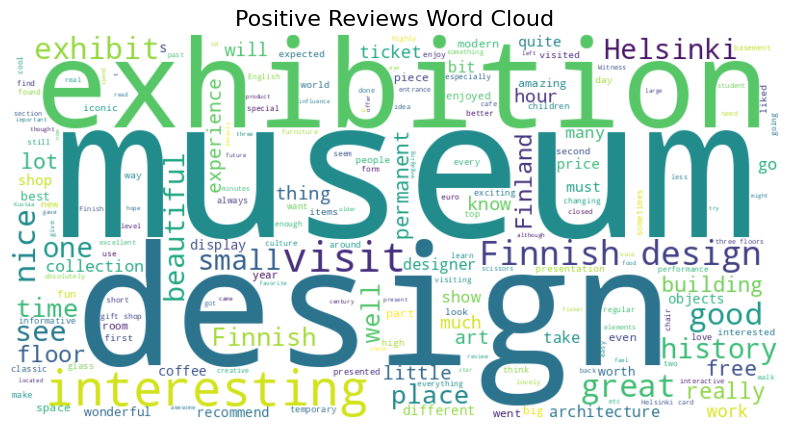

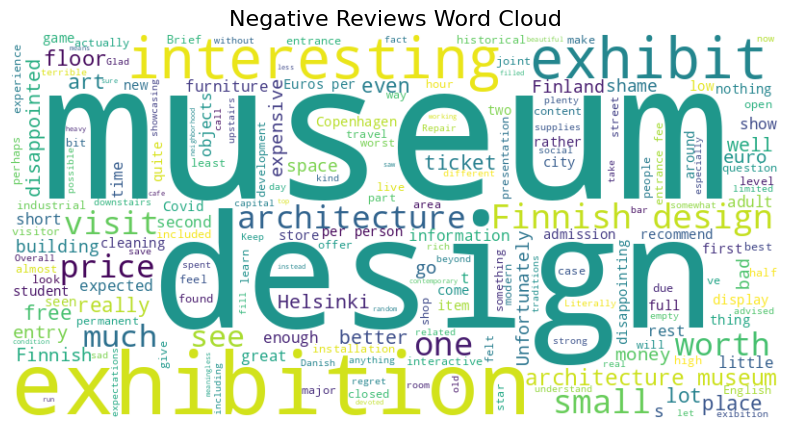

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['translated_review'].tolist())
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['translated_review'].tolist())

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')
